In [1]:
%run Helper.ipynb

Num GPUs Available:  1


In [ ]:
# Load all images
images = load_images()

In [ ]:
# Load all models
models = {}
for name, handle in ALL_MODELS.items():
    print('Loading model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    models[name] = load_model(handle)

In [ ]:
# Setup detections (which can be used to generate statistics later)
detections = {}
images_with_detection = {}

# Run detection for all models
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Run inference
    images_with_detection[name] = run_inference(images, model)

In [ ]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save generated detections for statistics
    detections[name] = get_detections_for_images(images_with_detection[name])

In [ ]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Draw detections on image
    draw_detections_on_images(images_with_detection[name])

In [ ]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save new images
    save_images(images_with_detection[name], name)

In [ ]:
# Generate statistics
get_statistics_for_detections(detections, len(images))
generate_detection_charts(detections, len(images))

In [70]:
generate_wordclouds_for_all_models(detections)

AttributeError: 'float' object has no attribute 'keys'

In [69]:
generate_wordclouds_by_dataset(detections)

AttributeError: 'float' object has no attribute 'keys'

EfficientDet: 0.9047714514835605
CenterNet: 0.8071253071253072
OpenImages (Faster R-CNN): 0.869935170178282
Faster R-CNN: 0.7692939244663383


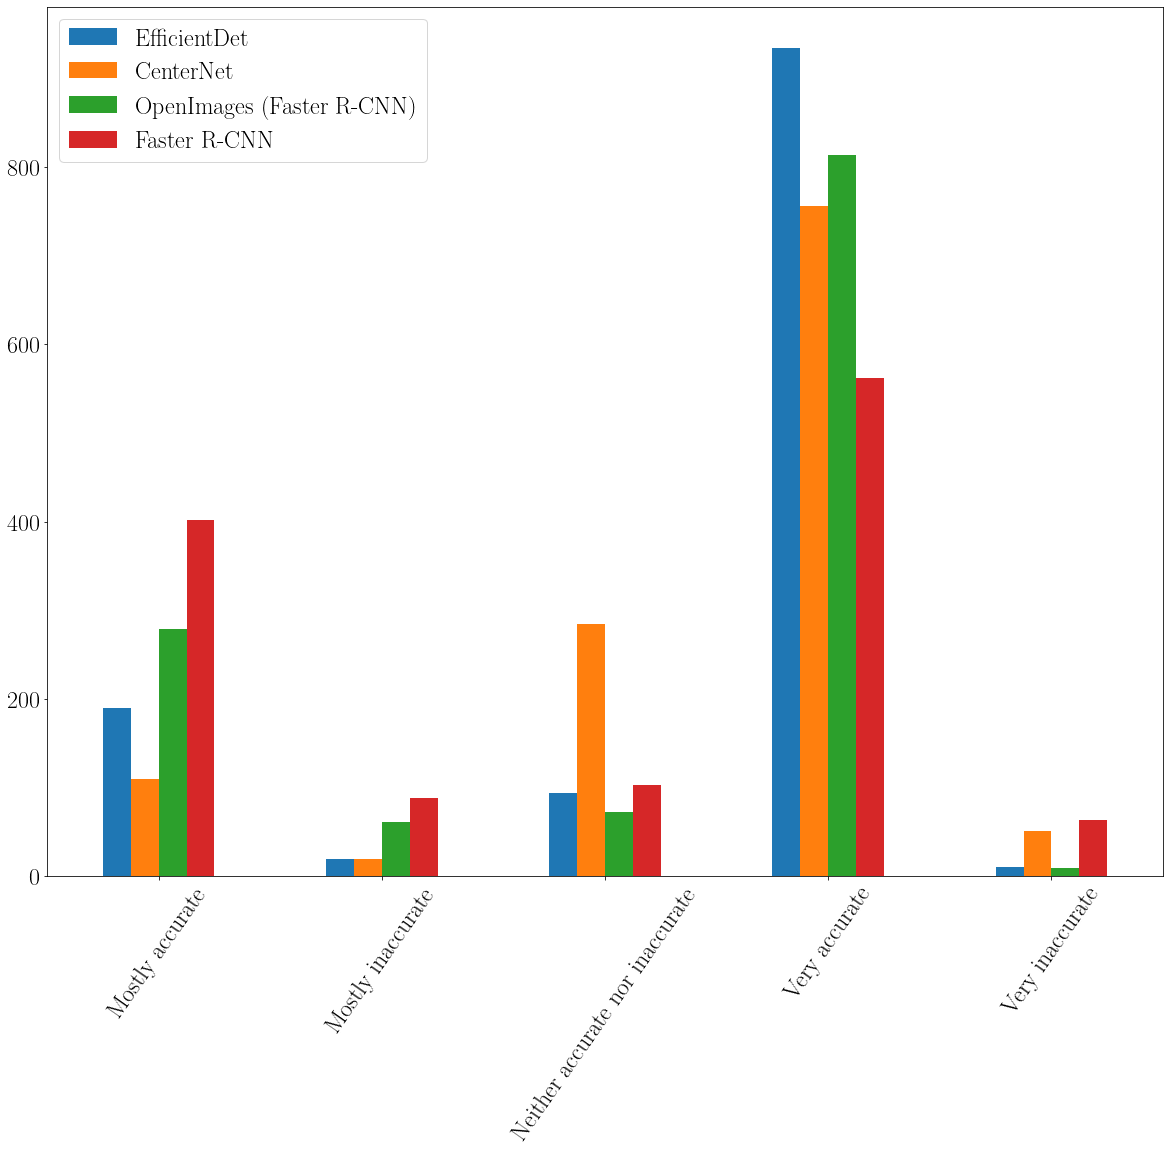

In [71]:
# Generate statistics from survey
detections = pd.read_csv("outputs/statistics/results_detection.csv")

mapping = {
    'Very accurate': 1,
    'Mostly accurate': 0.75,
    'Neither accurate nor inaccurate': 0.5,
    'Mostly inaccurate': 0.25,
    'Very inaccurate': 0
}

series = {}
for model_shortcut in ['EfficientDet', 'CenterNet', 'OpenImages (Faster R-CNN)', 'Faster R-CNN']:
    model_columns = detections.filter(like=model_shortcut[0]).columns
    
    mappings = pd.Series(dtype='float64')
    for column in model_columns:
        mappings = pd.concat([mappings, detections[column].dropna().map(lambda x: mapping[x])])
    
    series[model_shortcut] = detections[model_columns.array].apply(pd.value_counts).sum(axis=1)
    
    print(model_shortcut + ': ' + str(mappings.mean()))
    
plot = pd.DataFrame(series).plot(kind='bar', figsize=(20,16), fontsize=24)
plot.legend(prop={'size': 24})

for tick in plot.get_xticklabels():
    tick.set_rotation(55)